<a href="https://colab.research.google.com/github/pizzapuppies/FYP_code/blob/main/raw_data(real%20and%20im)%20%20CNN_for_dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

predictive ANN for solution


In [13]:
from google.colab import drive
import pandas as pd 
import os
import tensorflow as tf
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
import random
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
mat = [[1,2,3],[4,5,6]]

def split23(li):
  g = []
  for i in range(1,len(li),3):
    g.append(li[i:i+3])
  return g

In [15]:
X = []

with open('/content/gdrive/My Drive/FYP Dengue data - Sheet1.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  line_count = 0
    
  for i in csv_reader:
    if line_count == 0:
      for j in range(len(split23(i))):
        X.append([])
      
    line_count += 1
    if i[0] in ["index","conc","label"]:
            if i[0] == "label":
              y = split23(i)
    else:
      li = split23(i)
      
      for ind,dat in enumerate(li):
        
        X[ind].append(list(map(float,dat[1:])))




for i,li in enumerate(y):
  if li[0] == "1":
    y[i] = 1
  else:
    y[i] = 0

X = np.array(X)
y = np.array(y)

temp = list(zip(X, y))
random.shuffle(temp)
X, y = zip(*temp)
X, y = list(X), list(y)
X = np.array(X)
y = np.array(y)



In [16]:
#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X,y, test_size=0.10)

X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
print(X_train[0])
print(Y_train[0])
print("\nTrain Test Dimensions:\n------------------------------------")
print("shape of training set",X_train.shape, Y_train.shape)
print("shape of testing set",X_test.shape, Y_test.shape)

[[4.51805e+02 7.73061e+00]
 [4.51354e+02 5.80721e+00]
 [4.51415e+02 4.70664e+00]
 [4.55424e+02 9.58890e+00]
 [4.54344e+02 7.24787e+00]
 [4.53938e+02 5.79097e+00]
 [4.53781e+02 4.89459e+00]
 [4.53845e+02 4.34783e+00]
 [4.53117e+02 4.42568e+00]
 [4.53754e+02 4.46184e+00]
 [4.54297e+02 4.71363e+00]
 [4.54628e+02 5.29026e+00]
 [4.55060e+02 6.31011e+00]
 [4.55577e+02 7.62420e+00]
 [4.56224e+02 9.41864e+00]
 [4.57082e+02 1.17204e+01]
 [4.58105e+02 1.45574e+01]
 [4.59402e+02 1.81449e+01]
 [4.60885e+02 2.26857e+01]
 [4.62698e+02 2.85078e+01]
 [4.64639e+02 3.59835e+01]
 [4.66799e+02 4.57299e+01]
 [4.69067e+02 5.85514e+01]
 [4.71889e+02 7.57609e+01]
 [4.75299e+02 9.86788e+01]
 [4.80120e+02 1.29227e+02]
 [4.87916e+02 1.70099e+02]
 [4.99359e+02 2.23916e+02]
 [5.17790e+02 2.92961e+02]
 [5.46207e+02 3.81568e+02]
 [5.89197e+02 4.91242e+02]
 [6.54182e+02 6.25248e+02]
 [7.46087e+02 7.85642e+02]
 [8.73144e+02 9.73432e+02]
 [1.05023e+03 1.18998e+03]
 [1.28416e+03 1.42427e+03]
 [1.59549e+03 1.66575e+03]
 

In [17]:
from tensorflow import keras



In [18]:
#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

In [19]:
#Add the first hidden layer
model.add(keras.layers.Dense(128,         #Number of nodes
                        input_shape=(50,2), #Number of input variables
                        name='Hidden-Layer-1', #Logical name
                        activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(tf.keras.layers.Conv1D(
    2,3,activation='relu'
))
model.add(tf.keras.layers.Flatten())

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-3',
                              activation='relu'))



#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-4',
                              activation='relu'))




In [20]:
model.add(keras.layers.Dense(1,
                             name='Output-Layer',
                             activation='sigmoid'))

#model.summary()

In [21]:
#Compile the model with loss & metrics
model.compile(loss= tf.keras.losses.BinaryCrossentropy() ,
              metrics=['accuracy'])

In [22]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=10
#Set number of epochs
EPOCHS=20
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")
#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


Training Progress:
------------------------------------
Epoch 1/20
10/10 [==============================] - 1s 35ms/step - loss: 1.4415 - accuracy: 0.4000 - val_loss: 0.6932 - val_accuracy: 0.4615
Epoch 2/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6938 - accuracy: 0.4800 - val_loss: 0.6932 - val_accuracy: 0.4615
Epoch 3/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6934 - accuracy: 0.4800 - val_loss: 0.6932 - val_accuracy: 0.4615
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4615
Epoch 5/20
10/10 [==============================] - 0s 10ms/step - loss: 0.6938 - accuracy: 0.4400 - val_loss: 0.6932 - val_accuracy: 0.4615
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 0.6937 - accuracy: 0.4400 - val_loss: 0.6932 - val_accuracy: 0.4615
Epoch 7/20
10/10 [==============================] - 0s 10ms/step - loss: 0.6936 - accuracy: 0.460

In [23]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 22ms/step - loss: 0.6934 - accuracy: 0.4286


[0.693438708782196, 0.4285714328289032]


Accuracy during Training :
------------------------------------


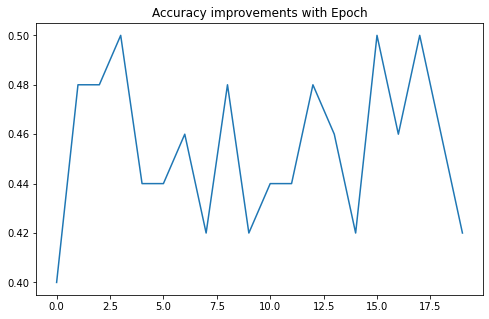

In [24]:
print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()